<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_3_Eric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413 Group Assignment 3

In [95]:
!pip install scikeras

In [135]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
# from google.colab import drive
# drive.mount('/content/drive')

In [98]:
# Reading in the dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/USCensusTraining.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/USCensusTest.csv'
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


# Eric:



## EDA - capital gain and loss

We can see that capital gain and capital loss will not appear together.
However, neural network may assign diffrent weights to capital gain and capital loss, therefore we can choose to combine or not combine.

<Axes: xlabel='capital-gain', ylabel='capital-loss'>

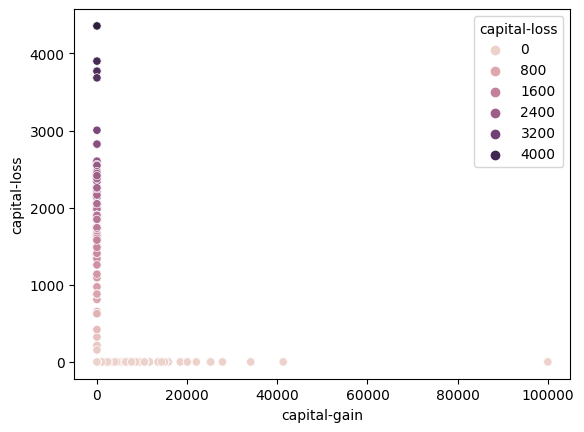

In [49]:
sns.scatterplot(x= data_train['capital-gain'], y = data_train['capital-loss'], hue = data_train['capital-loss'])

## EDA - Education Level

We can see that the relationship between education attainment level and the education-num are one-on-one relationship, therefore, we can safely take out one of them.

In [30]:
data_train['education'].unique()
edu_level = ['Preschool','1st-4th','5th-6th', '7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors', 'Masters','Prof-school','Doctorate']
data_train['education-level'] = pd.Categorical(data_train['education'], categories=edu_level, ordered=True)

In [32]:
# Cross-Tabulate
pd.crosstab(index=data_train['education-level'], columns=data_train['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education-level,,,,,,,,,,,,,,,,
Preschool,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1st-4th,0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,244,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,394,0,0,0,0,0,0,0,0,0,0,0
10th,0,0,0,0,0,721,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,909,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,323,0,0,0,0,0,0,0,0
HS-grad,0,0,0,0,0,0,0,0,8120,0,0,0,0,0,0,0


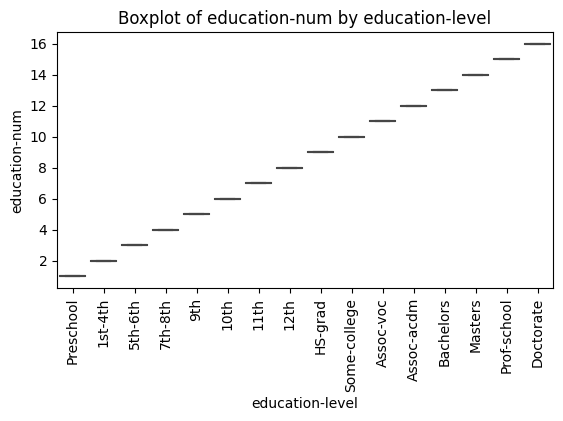

In [33]:
# Using Boxplot - no outlier - the relationship is one-on-one
plt.gca().set_aspect(0.5)
plt.xticks(rotation=90)
sns.boxplot(x='education-level', y='education-num', data=data_train)
plt.title('Boxplot of education-num by education-level')

plt.show()

Background chart from US Census Gov:

https://data.census.gov/vizwidget?g=010XX00US&infoSection=Educational Attainment


In [47]:
from IPython.display import HTML

# HTML content to be embedded
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Embedded HTML</title>
</head>
<body>
<iframe src="https://data.census.gov/vizwidget?g=010XX00US&infoSection=Educational Attainment" width="100%" height="300px" style="border: 0">
</body>
</html>
"""

# Display the HTML content
display(HTML(html_content))


## Preprocessing


In [50]:
# data_train = data_train.drop(columns = ['education'])

In [51]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              25000 non-null  int64   
 1   workclass        25000 non-null  object  
 2   demogweight      25000 non-null  int64   
 3   education-num    25000 non-null  int64   
 4   marital-status   25000 non-null  object  
 5   occupation       25000 non-null  object  
 6   relationship     25000 non-null  object  
 7   race             25000 non-null  object  
 8   sex              25000 non-null  object  
 9   capital-gain     25000 non-null  int64   
 10  capital-loss     25000 non-null  int64   
 11  hours-per-week   25000 non-null  int64   
 12  native-country   25000 non-null  object  
 13  income           25000 non-null  object  
 14  education-level  25000 non-null  category
dtypes: category(1), int64(6), object(8)
memory usage: 2.7+ MB


In [52]:
data_train.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000


## Question 1e

e. Which occupations are associated with predicted income over $50,000? Which education levels? Which ages? Is this intuitive? Construct graphs of the top three categorical predictors, and their relationship to predicted income. Make sure you fine-tune these graphs, and arrange the graphs so that they are truly helpful.

In [145]:
# Covert 0/1 variable
data_train['income'].unique()
data_train['50k'] = data_train['income'].map({'<=50K.':0, '>50K.':1})

In [99]:
df_edu_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <=50K.   16 non-null     int64  
 1   >50K.    16 non-null     int64  
 2   pct_50k  16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


### Explore Education
Conclusion:
When one's education is 'Baechelors','Masters','Prof-school', or 'Doctorate', one is more likely to have $50k+ income than others who don't.
It's in line with expectation: a more advanced degree will normally brings more income.

[Cut off level is 33%]

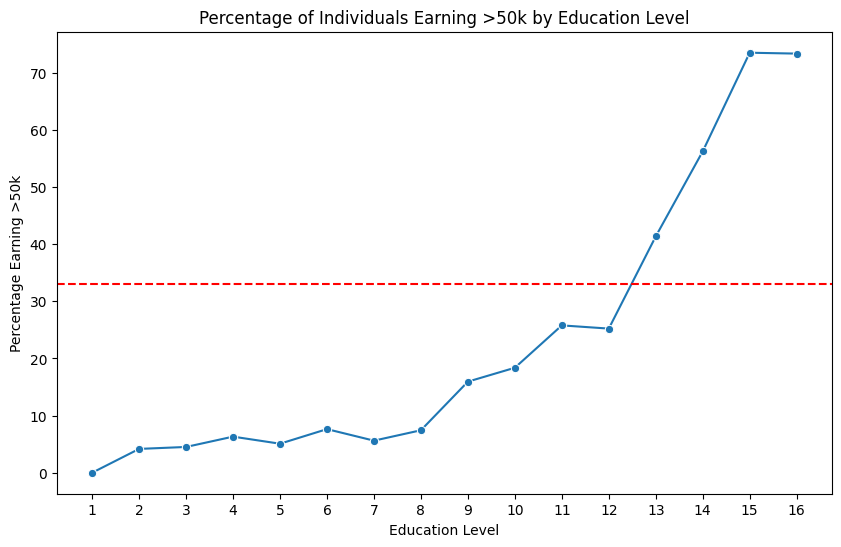

In [203]:
# Cross-Tabulate
df_edu_inc = pd.crosstab(index=data_train['education-num'], columns=data_train['income'])
df_edu_inc['pct_50k'] =  df_edu_inc['>50K.'] /df_edu_inc.sum(axis=1) * 100

# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x='education-num', y='pct_50k', data=df_edu_inc, marker='o')
plt.xticks(data_train['education-num'].unique()) #show every number
plt.xlabel('Education Level')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Education Level')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()


### Explore Age
Conclusion: When one's age is between 40 - 60, one is more likely to have $50k+ income than others who is younger or older.

It's in line with expectation: for younger person or retired person, the salary is more unlikely to reach $50k.

[Cut off level is 33%]

In [205]:
# Create bins according to 10s
bins = range(10, data_train['age'].max() + 10, 10)
# Bin the age column
data_train['age-bin'] = pd.cut(data_train['age'], bins=bins, right=False)
# Cross-Tabulate
df_age_inc = pd.DataFrame(pd.crosstab(index=data_train['age-bin'], columns=data_train['income']))
df_age_inc['pct_50k'] =  df_age_inc['>50K.'] /df_age_inc.sum(axis=1) * 100

# Check binning result
df_age_inc

# Calculate the mean percentage for each bin
# df_binned = df_edu_inc.groupby('education_bin')['pct_50k'].mean().reset_index()

income,<=50K.,>50K.,pct_50k
age-bin,,,
"[10, 20)",1255,2,0.159109
"[20, 30)",5814,380,6.134969
"[30, 40)",4821,1778,26.943476
"[40, 50)",3498,2037,36.802168
"[50, 60)",2102,1293,38.085420
"[60, 70)",1102,406,26.923077
"[70, 80)",338,74,17.961165
"[80, 90)",56,7,11.111111


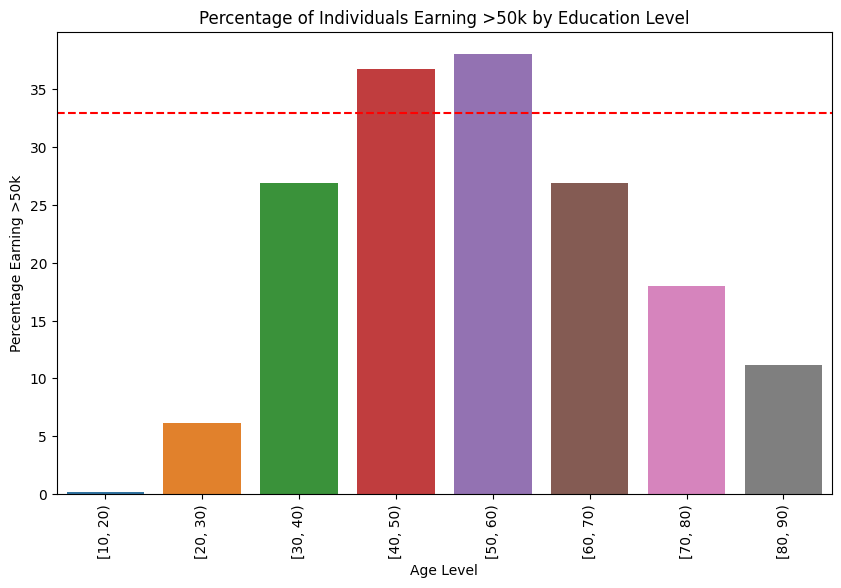

In [207]:
# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=df_age_inc.index.values, y='pct_50k', data=df_age_inc)
plt.xticks(rotation = 90) #show every number
plt.xlabel('Age Level')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Education Level')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()


### Explore Occupation

Conclusion: When one's occupation is "Exec-managerial" or "Prof-specialty" , one is more likely to have $50k+ income than others who works in other professions.

It's in line with expectation: managers and special professionals earn more than other occupations.

[Cut off level is 33%]

In [181]:
# Cross-Tabulate
df_occ_inc = pd.crosstab(index=data_train['occupation'], columns=data_train['income'])
df_occ_inc['pct_50k'] =  df_occ_inc['>50K.'] /df_occ_inc.sum(axis=1) * 100
#sns.barplot(x='occupation', y='pct_50k', data=df_occ_inc)

In [196]:
df_occ_inc = df_occ_inc.sort_values(by= 'pct_50k', ascending= False)

In [197]:
df_occ_inc

income,<=50K.,>50K.,pct_50k
occupation,,,
Exec-managerial,1596,1488,48.249027
Prof-specialty,1758,1422,44.716981
Protective-serv,343,160,31.809145
Tech-support,488,215,30.583215
Sales,2064,751,26.678508
Craft-repair,2419,703,22.517617
Transport-moving,978,250,20.358306
Adm-clerical,2582,393,13.210084
Machine-op-inspct,1348,188,12.239583


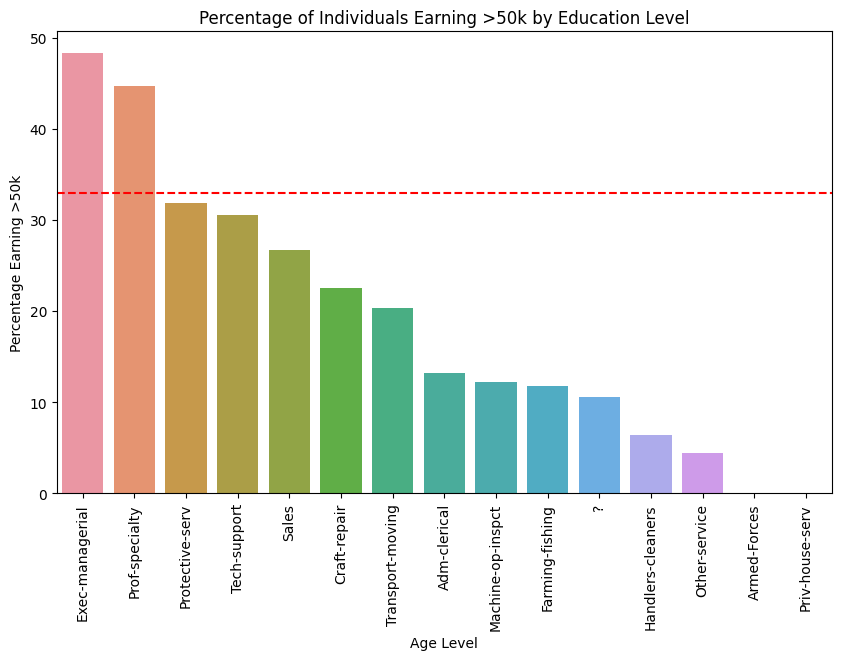

In [195]:
# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=df_occ_inc.index.values, y='pct_50k', data=df_occ_inc)
plt.xticks(rotation=90)
plt.xlabel('Age Level')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Education Level')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()

# Branch 1

In [56]:
data_test.info()
data_test.head()
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              7561 non-null   int64   
 1   workclass        7561 non-null   object  
 2   demogweight      7561 non-null   int64   
 3   education        7561 non-null   object  
 4   education-num    7561 non-null   int64   
 5   marital-status   7561 non-null   object  
 6   occupation       7561 non-null   object  
 7   relationship     7561 non-null   object  
 8   race             7561 non-null   object  
 9   sex              7561 non-null   object  
 10  capital-gain     7561 non-null   int64   
 11  capital-loss     7561 non-null   int64   
 12  hours-per-week   7561 non-null   int64   
 13  native-country   7561 non-null   object  
 14  education-level  7561 non-null   category
dtypes: category(1), int64(6), object(8)
memory usage: 835.2+ KB


(7561, 15)

In [57]:
# Getting dummy variables for the categorical variables for the training set
data_train = pd.get_dummies(data_train, columns = ['workclass', 'education', 'marital-status', 'occupation',
                                                   'relationship', 'race', 'sex',
                                                   'native-country'])
data_train = pd.get_dummies(data_train, columns = ['income'], drop_first= True)

KeyError: ignored

In [ ]:
data_train.head()

In [ ]:
data_train.describe()

In [ ]:
# Scaling the data
scaler = preprocessing.MinMaxScaler()
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_train

In [ ]:
# Making the array back into a dataframe
pd.DataFrame(scaled_data_train).describe()

scaled_data_train.shape

In [ ]:
# Defining X_train and y_train
X_train = scaled_data_train[:, :108]
y_train = scaled_data_train[:, 108]


In [ ]:
# Building the Neural Network
model = Sequential()

# Adding the layers
model.add(Dense(12, input_shape = (108,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

# Fitting the model on the training data
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

In [ ]:
predictions = model.predict(X_train)
rounded = [round(x[0]) for x in predictions]
print(rounded)